In [1]:
import os

import tensorflow as tf
import numpy as np
import re
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
class MyInception_v3(object):
    def __init__(self):
        # {449, n2849284}
        label_lookup_path = 'inception_model/imagenet_2012_challenge_label_map_proto.pbtxt'
        # {n19814672, cell}
        uid_lookup_path = 'inception_model/imagenet_synset_to_human_label_map.txt'
        
        self.node_lookup = self.load(label_lookup_path, uid_lookup_path)
        
        
    def load(self, label_lookup_path, uid_lookup_path):
        # 加载分类字符串 n****** 与对应分类名称
        uid_to_human = {} # 保存提取的字段
        proto_as_ascii_lines = tf.gfile.GFile(name=uid_lookup_path).readlines() # 一行一行读取
        for line in proto_as_ascii_lines:
            # 去掉换行符
            line = line.strip('\n') # 删除字符串头尾指定字符
            # 按照 '\t' 分割
            parsed_items = line.split('\t')
            # 获取分类编号
            uid = parsed_items[0]
            # 获取分类名称
            human_string = parsed_items[1]
            # 将编号字符串n******、分类名称一一映射
            uid_to_human[uid] = human_string
            
        # 加载分类字符串 n*****与对应分类编号 [1, 1000]
        node_id_to_uid = {}
        proto_as_ascii = tf.gfile.GFile(name=label_lookup_path).readlines()
        for line in proto_as_ascii:
            if line.startswith('  target_class:'):
                # 获取分类编号 [0, 1000]
                target_class = int(line.split(': ')[1])
            if line.startswith('  target_class_string:'):
                target_class_string = line.split(': ')[1]
                # 保存分类编号 [0,1000]与编号字符串n*****一一对应
                node_id_to_uid[target_class] = target_class_string[1:-2] # 对字符串去掉开头、结尾
            
        # 建立编号 [1, 1000] 对应分类名称映射关系
        node_id_to_name = {}
        for key, val in node_id_to_uid.items():
            # 获取分类名称
            name = uid_to_human[val]
            # 建立关系
            node_id_to_name[key] = name
        return node_id_to_name
           
        
    # 传入分类编号 [0, 1000] 返回分类名称
    def id_to_string(self, node_id):
        if node_id not in self.node_lookup:
            return 'Not Know'
        return self.node_lookup[node_id]
                

In [3]:
# 创建一个图来保存 GoogleNet 训练好的模型
#
# 读取 GoogleNet 模型文件信息, 文件信息为 二进制
with tf.gfile.FastGFile(name='./inception_model/classify_image_graph_def.pb', mode='rb') as f: # 什么读文件函数都可以，只是读个文件
    # 创建消息协议
    graph_def = tf.GraphDef()
    # 将 GoogelNet 模型消息解析为当前的模型信息
    graph_def.ParseFromString(f.read())
    # GoogleNet 模型信息导入当前图中
    tf.import_graph_def(graph_def=graph_def)

test_image/1.jpg


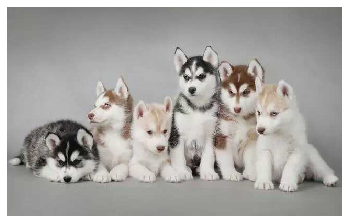

Siberian husky (score = 0.75042)
Eskimo dog, husky (score = 0.19329)
dogsled, dog sled, dog sleigh (score = 0.01824)

test_image/467510253.jpeg


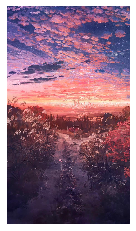

cliff dwelling (score = 0.63139)
cliff, drop, drop-off (score = 0.19472)
valley, vale (score = 0.03902)

test_image/481605_车3-4.jpg


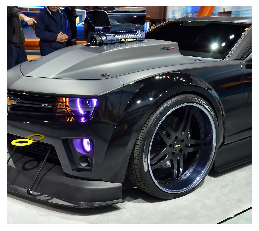

car wheel (score = 0.53358)
racer, race car, racing car (score = 0.17356)
sports car, sport car (score = 0.10450)

test_image/488683369.jpeg


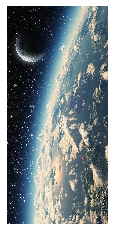

alp (score = 0.23203)
wing (score = 0.08452)
valley, vale (score = 0.05408)

test_image/492612_炫动跑车.jpg


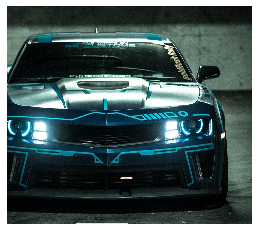

racer, race car, racing car (score = 0.76281)
grille, radiator grille (score = 0.08901)
sports car, sport car (score = 0.08800)

test_image/521335_古剑奇谭q-2.jpg


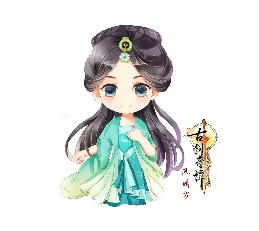

pencil sharpener (score = 0.09058)
overskirt (score = 0.08002)
comic book (score = 0.05111)

test_image/521619_梦想-3.jpg


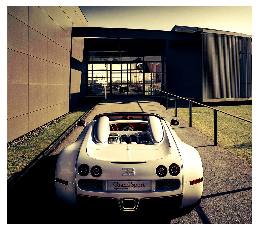

convertible (score = 0.26749)
sports car, sport car (score = 0.23924)
racer, race car, racing car (score = 0.20250)

test_image/521620_梦想-4.jpg


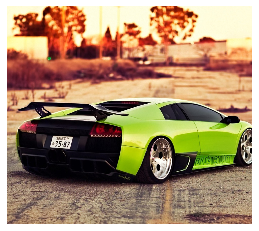

sports car, sport car (score = 0.82897)
convertible (score = 0.03741)
car wheel (score = 0.02512)

test_image/522023_风中奇缘-1.jpg


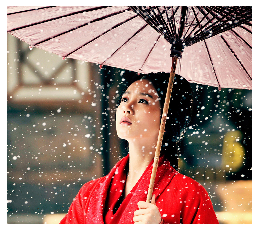

umbrella (score = 0.78680)
kimono (score = 0.21130)
carousel, carrousel, merry-go-round, roundabout, whirligig (score = 0.00007)

test_image/522754_夕阳下的安静.jpg


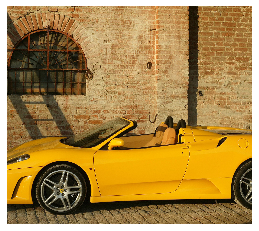

sports car, sport car (score = 0.89952)
convertible (score = 0.04105)
car wheel (score = 0.00784)

test_image/523331_匆匆那年-3.jpg


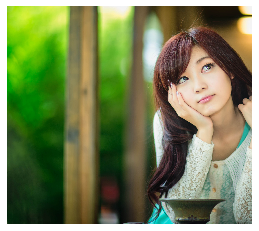

kimono (score = 0.16219)
notebook, notebook computer (score = 0.12205)
apron (score = 0.04546)

test_image/523880_春日风尚-1.jpg


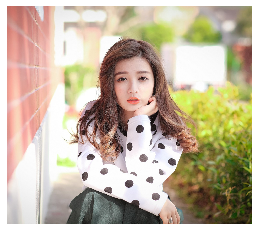

pajama, pyjama, pj's, jammies (score = 0.22185)
jersey, T-shirt, tee shirt (score = 0.08570)
bib (score = 0.07492)

test_image/523958_萌萌哒-3.jpg


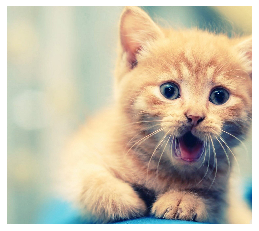

tabby, tabby cat (score = 0.24820)
Persian cat (score = 0.24571)
tiger cat (score = 0.09772)

test_image/523959_萌萌哒-4.jpg


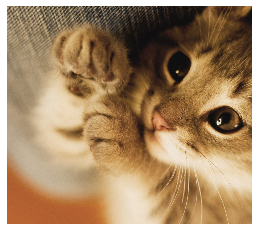

tabby, tabby cat (score = 0.64736)
tiger cat (score = 0.15373)
Egyptian cat (score = 0.06870)

test_image/523967_萌萌哒-12.jpg


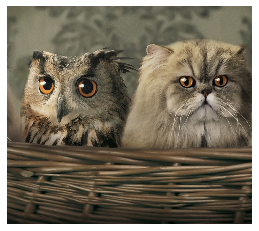

Persian cat (score = 0.73349)
great grey owl, great gray owl, Strix nebulosa (score = 0.01606)
lynx, catamount (score = 0.00528)

test_image/524044_miss 泡芙-1.jpg


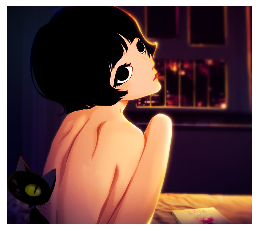

lighter, light, igniter, ignitor (score = 0.34015)
mask (score = 0.31970)
piggy bank, penny bank (score = 0.03624)

test_image/526193_狗狗3.jpg


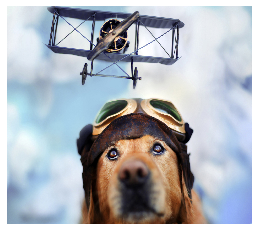

Rhodesian ridgeback (score = 0.36738)
American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier (score = 0.17645)
Doberman, Doberman pinscher (score = 0.14393)

test_image/526194_狗狗4.jpg


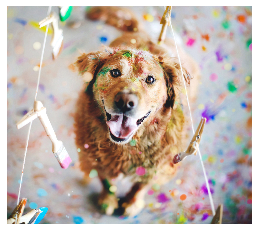

golden retriever (score = 0.58254)
Chesapeake Bay retriever (score = 0.10682)
Labrador retriever (score = 0.02351)

test_image/527102_风浪.jpg


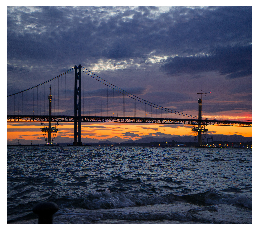

pier (score = 0.75897)
suspension bridge (score = 0.05810)
container ship, containership, container vessel (score = 0.04188)

test_image/527108_城市之光.jpg


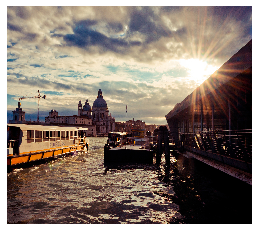

dock, dockage, docking facility (score = 0.36612)
pier (score = 0.35391)
gondola (score = 0.04558)

test_image/527109_城市之光2.jpg


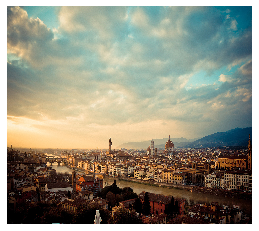

seashore, coast, seacoast, sea-coast (score = 0.56312)
pier (score = 0.05061)
suspension bridge (score = 0.03665)

test_image/527261_海天一线2.jpg


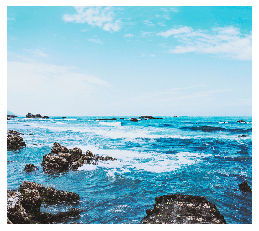

seashore, coast, seacoast, sea-coast (score = 0.50598)
promontory, headland, head, foreland (score = 0.16671)
breakwater, groin, groyne, mole, bulwark, seawall, jetty (score = 0.04367)

test_image/527276_冬天.jpg


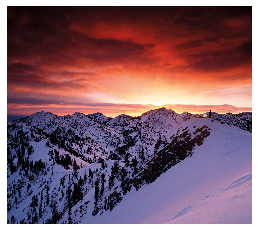

alp (score = 0.85123)
valley, vale (score = 0.04490)
seashore, coast, seacoast, sea-coast (score = 0.01288)

test_image/527759_可爱狗狗1.jpg


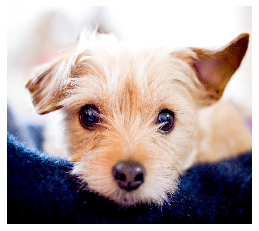

Norwich terrier (score = 0.48308)
Norfolk terrier (score = 0.37655)
Australian terrier (score = 0.00493)

test_image/527795_阳光正好.jpg


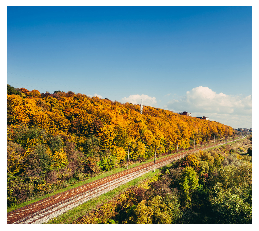

valley, vale (score = 0.15660)
alp (score = 0.15220)
rapeseed (score = 0.09266)

test_image/527824_瀑布1.jpg


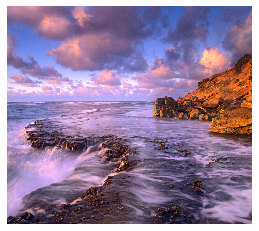

seashore, coast, seacoast, sea-coast (score = 0.37563)
promontory, headland, head, foreland (score = 0.33734)
lakeside, lakeshore (score = 0.03664)

test_image/B9QTN0DL0AI90005.jpg


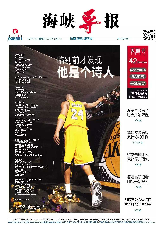

web site, website, internet site, site (score = 0.77416)
menu (score = 0.02023)
comic book (score = 0.01518)

test_image/img-19c20a8968e258530ee5dca480afe53e.jpg


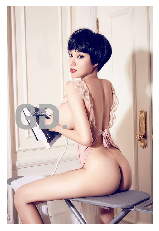

maillot (score = 0.43297)
wig (score = 0.10110)
bikini, two-piece (score = 0.07368)



In [4]:
# 创建会话
with tf.Session() as sess:
    # 获取当前图
    graph = tf.get_default_graph()
    # 验证 GoogleNet 节点
#     i = 0
#     for op in graph.get_operations():
#         i += 1
#         print(op.name)
#     print(i)
    
    
    # 在获取 GoogleNet tensor 时，多次运行一定要 restart kernel 否在获取不到，因为会加载多个图导致命名混乱
    #
    # 获取 输入节点
    x_tensor = graph.get_tensor_by_name(name='import/DecodeJpeg/contents:0')
    # 获取 GoogleNet softmax 的 op，以便预测使用
    # 注意使用 根节点路径
    softmax_tensor = graph.get_tensor_by_name(name='import/softmax:0')
    
    # 遍历图片目录
    #
    # 遍历三级目录 root(dirs(files))
    for root, dirs, files in os.walk(top='test_image'):
        for file in files:
            image_path = os.path.join(root + '/', file)
            # 读取图片文件
            image_data = tf.gfile.FastGFile(name=image_path, mode='rb').read()
            # 预测
            predictions = sess.run(softmax_tensor, feed_dict={x_tensor: image_data})
            predictions = np.squeeze(a=predictions) # 将结果的 2 维数据，降维 1维 :[[1], [2]] --> [1, 2]
            
            # 打印图片路径及名称
            print(image_path)
            img = Image.open(fp=image_path)
            plt.imshow(X=img)
            plt.axis('off')
            plt.show()
            
            # 1000 分类
            top_3 = predictions.argsort()[-3:][::-1]
            
            # 初始化类（对图片编号，id操 作）
            node_lookup = MyInception_v3()
            for node_id in top_3:
                # 获取分类名称 car,cat
                human_string = node_lookup.id_to_string(node_id)
                # 获取置信度分数
                score = predictions[node_id]
                print('%s (score = %.5f)'%(human_string, score), end='\n')
            # 换行
            print()